In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import sirtipy
from scipy.integrate import trapz, quad
from scipy.special import gamma as gammafunc
from scipy.optimize import curve_fit
import pdb

 Try again with a smaller value of ds to see if result changes.
Location 100 of 3086
Location 200 of 3086
Location 300 of 3086
Location 400 of 3086
Location 500 of 3086
Location 600 of 3086
Location 700 of 3086
Location 800 of 3086
Location 900 of 3086
Location 1000 of 3086
Location 1100 of 3086
Location 1200 of 3086
Location 1300 of 3086
Location 1400 of 3086
Location 1500 of 3086
Location 1600 of 3086
Location 1700 of 3086
Location 1800 of 3086
Location 1900 of 3086
Location 2000 of 3086
Location 2100 of 3086
Location 2200 of 3086
Location 2300 of 3086
Location 2400 of 3086
Location 2500 of 3086
Location 2600 of 3086
Location 2700 of 3086
Location 2800 of 3086
Location 2900 of 3086
Location 3000 of 3086


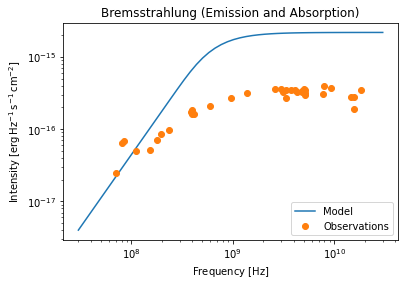

In [3]:
# PART B
# Bremsstrahlung -- emission from RL 5.14b
def j_bremsstrahlung(frequency, location, Inu, Z2x, T, ne):
    # FIXME: Calculate the emission epsilon_nu^ff from RL equation 5.14b. You may assume
    # that the Gaunt factor is 1, and that Z^2 n_e n_i = Z2x n_e^2 (i.e. the properties of the
    # ions are all folded into Z2x).
    epsff = 6.8E-38 * Z2x * ne**2 * T**(-1./2.) * np.exp(-(const.h.value * frequency) / (const.k_B.value * T) )

    # Note that emission coefficient j is 1/4pi times the emission because it is per
    # unit solid angle.
    return epsff / (4. * np.pi)

# Bremsstrahlung -- absorption from 5.18b
def alpha_bremsstrahlung(frequency, location, Inu, Z2x, T, ne):
    # FIXME: Calculate the absorption coefficient alpha_nu^ff from RL equation 5.18b. You may
    # make the same assumptions as in j_bremsstrahlung.
    alphaff = 3.8E8 * T**(-1./2.) * Z2x * ne**2 * frequency**(-3.) * (1 - np.exp(-(const.h.value * frequency) / (const.k_B.value * T)))

    return alphaff

# Name of file with data. The file has two columns -- the first column is the frequency
# in Hz, and the second column is the flux in erg / s / Hz / cm^2.
infile = 'orion.dat'
# Read in the text file and put it into the variable obsdat. This will result in a 2-dimensional
# array that is N_spectral_pts x N_columns (2 in this case). To access all of the frequencies,
# you can use obsdata[:,0] and to access all of the fluxes, you can use obsdata[:,1]. The
# ":" in the first index means "give me everything", and the second index tells it which column
# you want (the first column is 0, the second column is 1, etc).
obsdata = np.loadtxt(infile)
obs_freq = obsdata[:,0]
obs_flux = obsdata[:,1]

# Convert flux to intensity using the assumed distance and object size.
dist = (500 * u.pc).cgs.value
size = (1 * u.pc).cgs.value
# Use RL 1.13 to convert between flux and intensity
obs_intensity = obs_flux / (np.pi * (size/dist)**2)

# Create a logarithmically-spaced frequency axis in the radio spectrum (from 30 MHz to 3000 MHz).
freqaxis_c = sirtipy.frequency_axis('log', frange=[3e7*u.Hz, 3e10*u.Hz], numpts=50)

# Try these sample parameters, where the mean value of Z^2 is 2, the temperature is 15,000K,
# and the electron number density is 2000 cm^-3.
Z2x = 2.
T = 1.5e4
ne = 2e3
# Put them into a tuple to feed into the bremsstrahlung functions.
func_params = (Z2x, T, ne,)

# Create a medium.
medium_c = sirtipy.region()
# Add the absorption and emission functions.
medium_c.add_absorption_func(alpha_bremsstrahlung, func_params)
medium_c.add_emission_func(j_bremsstrahlung, func_params)

# Do radiative transfer from the back of the nebula to the front.
s_c = [-size, size]

# Start off with an empty spectrum.
inspec_empty = sirtipy.spectrum('empty', frequencies=freqaxis_c)
ds = 2e15

# Do the radiative transfer.
spec_c, tau_c, locations_c = sirtipy.radiative_transfer(medium_c, inspec_empty,
        s_c, ds, printevery=100)

# Plot up the observed data and the RT solution.
# Note that when indexing a python array, you can use negative values
# to count from the end of the array instead of the front. So "-1" means
# the last entry, "-2" means the second-last entry, etc. Since spec_c
# contains all of the spectra, from beginning to end, we can use
# spec_c[-1] to access the final spectrum.
spec_c[-1].plot(xunit=u.Hz, label='Model')
# Overplot the observational data.
plt.plot(obs_freq, obs_intensity, 'o', label='Observations')
plt.title('Bremsstrahlung (Emission and Absorption)')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right')

plt.savefig('3b-Bremsstrahlung-j-alpha.png')

Trying T=20000.0 n_e=2000.0
 Try again with a smaller value of ds to see if result changes.
Trying T=20000.0 n_e=2000.0
 Try again with a smaller value of ds to see if result changes.
Trying T=20000.0 n_e=2000.0
 Try again with a smaller value of ds to see if result changes.
Trying T=20000.0 n_e=2000.0
 Try again with a smaller value of ds to see if result changes.
Trying T=20000.0 n_e=2000.0
 Try again with a smaller value of ds to see if result changes.
Trying T=4708.9 n_e=790.6
 Try again with a smaller value of ds to see if result changes.
Trying T=4708.9 n_e=790.6
 Try again with a smaller value of ds to see if result changes.
Trying T=4708.9 n_e=790.6
 Try again with a smaller value of ds to see if result changes.
Trying T=4211.7 n_e=586.3
 Try again with a smaller value of ds to see if result changes.
Trying T=4211.7 n_e=586.3
 Try again with a smaller value of ds to see if result changes.
Trying T=4211.7 n_e=586.3
 Try again with a smaller value of ds to see if result changes.


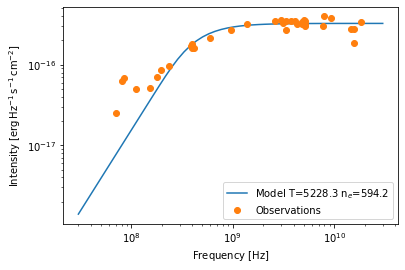

In [6]:
# PART C
# Numerically calculate the best-fit value of the bremsstrahlung physical parameters for the
# Orion nebula using scipy.optimize.curve_fit.

# To use curvefit, we need to give it a function that takes as inputs:
#   1) The independent (x) values of the observational data. In this case, that is frequency nu.
#   2) The parameters that we want to constrain. In this case, we have two parameters we care
#      about: temperature T and electron number density ne.
# The function must return the dependent (y) observational values that are predicted by our model
# for the given x values. In our case, that means the intensity we would predict at each of those
# frequencies.
#
# Therefore, what our function will do is set up a radiative transfer calculation for the given
# physical parameters at the required frequencies, do the calculation, and return the intensities.
def bremsstrahlung_spectrum(nu, T, ne):
    Z2x = 2.
    func_params = (Z2x, T, ne)
    print('Trying T=%0.1f n_e=%0.1f' % (T, ne))

    medium_d = sirtipy.region()
    medium_d.add_absorption_func(alpha_bremsstrahlung, func_params)
    medium_d.add_emission_func(j_bremsstrahlung, func_params)
  
    s_d = [-size,size]
    freqaxis_d = sirtipy.frequency_axis('verbatim', frequencies=nu*u.Hz)
    inspec_empty = sirtipy.spectrum('empty', frequencies=freqaxis_d)
    spec_d, tau_d, locations_d = sirtipy.radiative_transfer(medium_d, inspec_empty, s_d, ds)

    # FIXME: When you want to fit in log-space instead of linear-space, comment out the first line
    # and uncomment the second line instead, which returns log_10 of the intensity.
    return spec_d[-1].intensity
    #return np.log10(spec_d[-1].intensity)


# For the initial guess, use T=2e4 K   and ne=2e3 cm^-3. We know that's wrong, but that's fine -- we
# want to see what it comes up with on its own!
# FIXME: Play with these.
initial_parms = [2e4, 2e3]

# This is the line that actually does the fitting! It takes 4 parameters:
#   1) The function we defined that returns the model predictions for a given set of parameters: bremsstrahlung_spectrum.
#   2) The observational independent (x) values: obs_freq
#   3) The observational dependent (y) values: obs_intensity
#   4) (optional) A set of intiial guesses for the parameters. If this is way off, the fit might have
#	trouble converging.
#
# curve_fit returns two variables: The best-fit set of parameters, and a covariance matrix that you
# can use to estimate the uncertainty in the fit (google "scipy.optimize.curve_fit" and read the description
# to learn more! Note that I did not include the observational uncertainties when I digitized the data, so
# the uncertainties are not accurate).
fit_parms, fit_covariance = curve_fit(bremsstrahlung_spectrum, obs_freq, obs_intensity, p0=initial_parms)
# FIXME: When you want to fit in log-space instead of linear-space, comment out the line above and
# uncomment the line below instead, which uses log_10 of the observational intensity as the dependent
# variable.
#fit_parms, fit_covariance = curve_fit(bremsstrahlung_spectrum, obs_freq, np.log10(obs_intensity), p0=initial_parms)

# Calculate the best-fit spectrum across the whole plot range so we can see what it looks like.
fit_spec = sirtipy.spectrum('verbatim', frequencies=freqaxis_c, \
   intensities=bremsstrahlung_spectrum(freqaxis_c.frequencies, *fit_parms))
# FIXME: When you fit in log-space instead of linear-space, use the following line instead of the line above:
#fit_spec = sirtipy.spectrum('verbatim', frequencies=freqaxis_c, \
#    intensities=10.**(bremsstrahlung_spectrum(freqaxis_c.frequencies, *fit_parms)))

# Plot up the observations and the best-fit model, also displaying what the best-fit
# values of the physical parameters were.
plt.figure()
fit_spec.plot(xunit=u.Hz, label='Model T=%0.1f n$_e$=%0.1f' % (fit_parms[0], fit_parms[1]))
plt.plot(obs_freq, obs_intensity, 'o', label='Observations')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right')

# FIXME: Update this when you make more plots.
plt.savefig('3d-log-fit.png')